# Métaheuristique pour le voyageur de commerce

On souhaite résoudre le problème du voyageur de commerce à l'aide d'une métaheuristique.

Le problème du voyageur de commerce euclidien consiste, étant donné un ensemble de `n` points en 2D, à déterminer un tour de plus petite distance reliant ces points.

## Questions préliminaires

Avant de chercher une bonne solution pour le problème, on doit se poser les questions suivantes : 
- Qu'est-ce qu'une solution du TSP ? Algorithmiquement ?
- Comment la représenter algorithmiquement ?
- Quel est le nombre de solutions pour le problème si j'ai 5 villes ? `n` villes ?

## Import et initialisation du code

Les 3 cellules suivantes sont à exécuter avant de commencer.

In [5]:
import random as r
import math as m

# Pour l'affichage des points et des tournées
import matplotlib.pyplot as plt

# Pour pouvoir utiliser les tuples nommés
from collections import namedtuple

In [6]:
%matplotlib inline

In [7]:
# pour redimensionner les figures par défaut
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

## Génération des points et création de l'instance du problème de voyageur de commerce euclidien

On souhaite définir une instance aléatoire.
Pour cela, on crée deux tableaux `x` et `y` contenant les abscisses et les ordonnées des points. Les valeurs sont des nombres entiers entre 0 et 100. On calcule ensuite les distances entre toute paire de points que l'on stocke dans un tableau de tableaux.

Pour simplifier l'accès aux données, on utilise les [tuples nommés](https://dbader.org/blog/writing-clean-python-with-namedtuples).


Premier point (69,25)
Distance entre les deux premiers points =  53.600373133029585


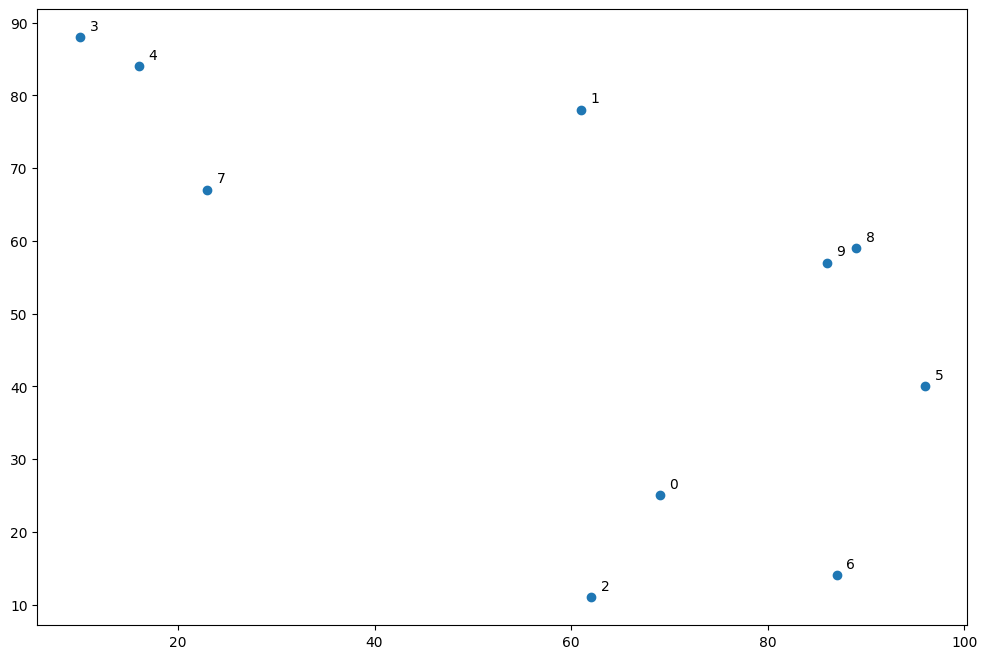

In [8]:
# Nombre de points dans l'instance
n = 10

# Coordonnées aléatoires des points (abscisses et ordonnées)
x = [ r.randint(0, 100)  for _ in range(n) ]
y = [ r.randint(0, 100)  for _ in range(n) ]

# Calcul des distances
d = [ [m.sqrt((x[i]-x[j])**2 + (y[i] - y[j])**2) for j in range(n) ] for i in range(n)]

# Namedtuple pour stocker une instance
Coordonnes = namedtuple("Coordonnes", ["x", "y"])
Instance = namedtuple("Instance", ["coords", "d"])

# Création de l'instance avec les namedtuples
coords = Coordonnes(x, y)
ins = Instance(coords, d)

# utilisation
print(f"Premier point ({ins.coords.x[0]},{ins.coords.y[0]})")
print("Distance entre les deux premiers points = ", ins.d[0][1])


def affichage_instance(ins, labels = True):
    plt.scatter(ins.coords.x, ins.coords.y)
    if labels:
        for i in range(n):
            plt.annotate(i, (ins.coords.x[i] + 1, ins.coords.y[i] + 1))
    
affichage_instance(ins)


## Solution du voyageur de commerce

On peut représenter une solution du voyageur de commerce à l'aide d'un tableau contenant la séquence des indices des points. Si l'on a `n` points, on a donc un tableau contenant les entiers de `0` à `n-1` inclus.

Par exemple, si l'on a 5 points, alors une solution peut être `[0, 3, 1, 2, 4]`. Cela signifie que le tour visite le point numéro 0, puis les points du numéro 3, 2 puis 4 avant de revenir au point numéro 0.

Le tour passant par les points 0, 1, ..., `n-1` peut donc être défini par :

In [9]:
tour = list(range(len(ins.coords.x)))

On peut maintenant définir une fonction d'affichage pour un tour sur l'instance de la manière suivante :

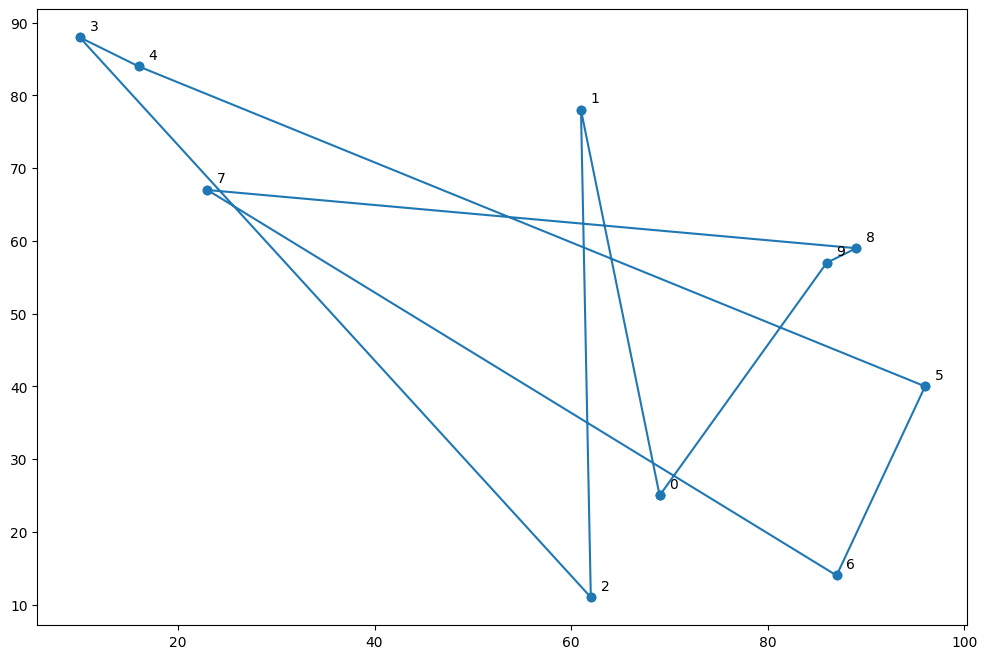

In [10]:
def affichage_tour(ins, tour, labels = True):
    affichage_instance(ins, labels)
    tour_avec_retour = tour + [tour[0]]
    x = [ins.coords.x[p] for p in tour_avec_retour]
    y = [ins.coords.y[p] for p in tour_avec_retour]
    plt.plot(x, y, "o-")

affichage_tour(ins, tour)


## Coût d'un tour

Il faut maintenant déterminer le coût d'une tournée. 
Définir la fonction `cout_tour` prenant en paramètre une instance et un tour et retournant le coût de ce tour, c'est-à-dire la distance parcourue pour effectuer ce tour.

In [11]:
def cout_tour (instance, tour) :
    cout = 0
    for i in range(len(tour)) :
        cout += instance.d[tour[i-1]][tour[i]]
    return cout

cout_tour(ins, tour)

528.9685106339145

## Heuristiques pour la construction d'une première solution

Il faut maintenant définir une ou plusieurs heuristiques et les implémenter. 

[69, 61, 62, 10, 16, 96, 87, 23, 89, 86]
264.446293374571


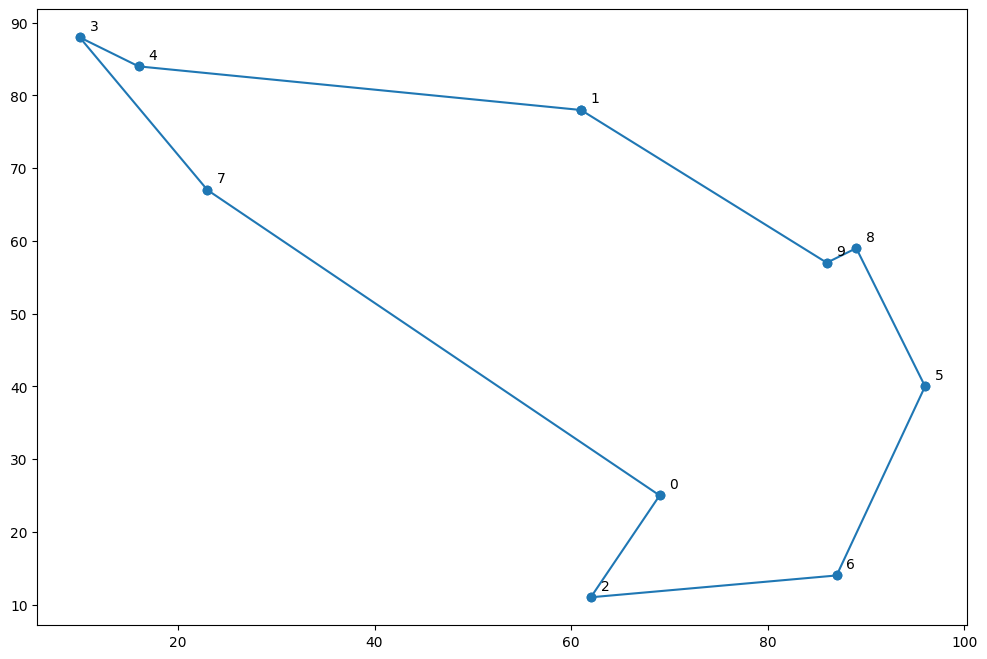

In [12]:
def heuristique(instance):
    print(instance.coords.x)
    n = len(instance.coords.x)
    best_tour = None
    best_cout = float('inf')
    for i in range(100000):
        tour = list(range(n))
        r.shuffle(tour)
        cout = cout_tour(instance, tour)
        if cout < best_cout:
            best_cout = cout
            best_tour = tour
    affichage_tour(instance, best_tour)
    return best_tour

print(cout_tour(ins, heuristique(ins)))

## Métaheuristique pour le TSP

Définir une ou plusieurs métaheuristiques pour le TSP.
Pour cela, définir un ou plusieurs voisinages. Définir ensuite une ou plusieurs métaheuristiques (descente, descente avec départ multiples, recuit simulé, recherche tabou, etc). Comparer les différentes méthodes entre elles (qualité des solutions, temps de résolution, nombre d'itérations, etc).


528.9685106339145
450.0778205096758


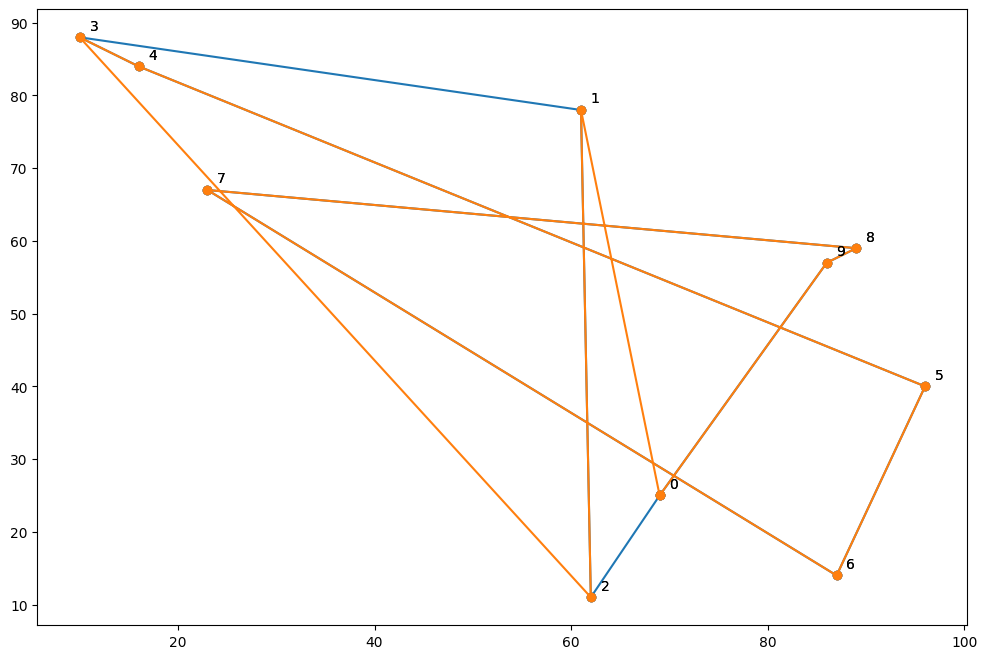

In [13]:
tour = list(range(len(ins.coords.x)))

def metaheuristique_graphic(ins, tour, a, b, labels = True):
    affichage_instance(ins, labels)
    tour_avec_retour = tour + [tour[0]]
    tour_avec_retour[a], tour_avec_retour[b] = tour_avec_retour[b], tour_avec_retour[a]
    x = [ins.coords.x[p] for p in tour_avec_retour]
    y = [ins.coords.y[p] for p in tour_avec_retour]
    plt.plot(x, y, "o-")
    affichage_tour(ins, tour)
    print(cout_tour(ins, tour))
    print(cout_tour(ins, tour_avec_retour))

metaheuristique_graphic(ins, tour, 1, 2)


[0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 0]

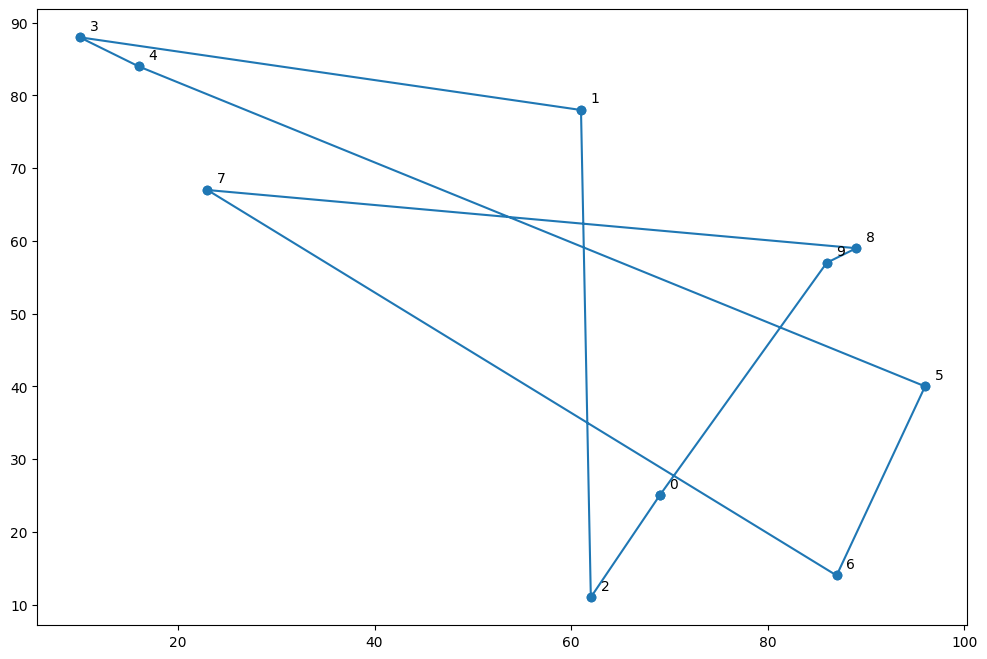

In [14]:
def metaheuristique(ins, tour, a, b, labels = True):
    affichage_instance(ins, labels)
    tour_avec_retour = tour + [tour[0]]
    tour_avec_retour[a], tour_avec_retour[b] = tour_avec_retour[b], tour_avec_retour[a]
    x = [ins.coords.x[p] for p in tour_avec_retour]
    y = [ins.coords.y[p] for p in tour_avec_retour]
    plt.plot(x, y, "o-")
    if cout_tour(ins, tour) > cout_tour(ins, tour_avec_retour) :
        return tour_avec_retour
    else :
        return tour

metaheuristique(ins, tour, 1, 2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
528.9685106339145
ccc
aaaaa531.2138973384389
bbbbb531.2138973384389
ccc
aaaaa452.3232072142
bbbbb452.3232072142
ccc
aaaaa602.0574247533756
bbbbb602.0574247533756
ccc
aaaaa602.2404428146631
bbbbb602.2404428146631
ccc
aaaaa626.0087436042638
bbbbb626.0087436042638
ccc
aaaaa610.953701538023
bbbbb610.953701538023
ccc
aaaaa630.7096664017259
bbbbb630.7096664017259
ccc
aaaaa668.0493486985725
bbbbb668.0493486985725
ccc
aaaaa668.0493486985727
bbbbb668.0493486985727
ccc
aaaaa668.0493486985725
bbbbb668.0493486985725
668.0493486985725


[0, 8, 6, 4, 2, 0, 1, 3, 5, 7, 9]

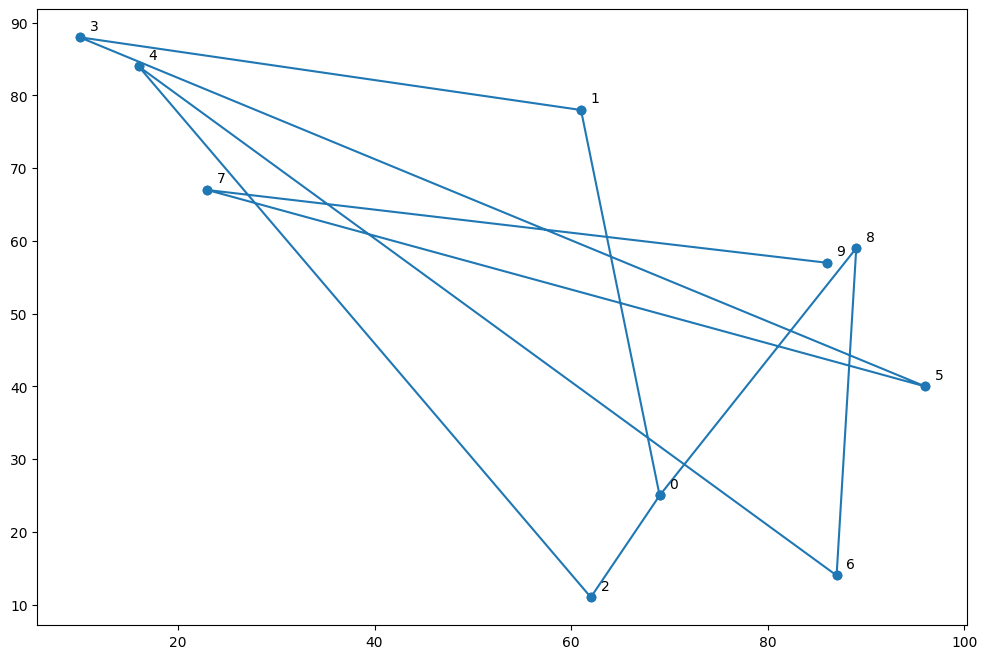

In [27]:
tour = list(range(len(ins.coords.x)))

def change_arrete(instance, tour, labels = True) :
    affichage_instance(ins, labels)
    i=0
    j=0
    tour_avec_retour = tour + [tour[0]]
    print(tour_avec_retour)
    time = cout_tour(instance, tour_avec_retour)
    print(time)
    while i<=len(tour) :
        while j<=len(tour) :
            if i==j :
                j+=1
            tour_tmp = reverse(tour_avec_retour, i, j)
            print("aaaaa" + str(cout_tour(instance, tour_tmp)))
            print("bbbbb" + str(cout_tour(instance, tour_avec_retour)))
            if cout_tour(instance, tour_tmp) < time :
                tour_avec_retour = tour_tmp
            j += 1
        i +=1
    x = [ins.coords.x[p] for p in tour_avec_retour]
    y = [ins.coords.y[p] for p in tour_avec_retour]
    plt.plot(x, y, "o-")
    print(cout_tour(instance, tour_avec_retour))
    return tour_avec_retour
        

def reverse(tab, a, b):
    tab[a:b+1] = reversed(tab[a:b+1])
    print("ccc")
    return tab

change_arrete(ins, tour)